# Branching ratios

A newly discovered particle was found to be able to decay in two different ways (two different decay channels): $\alpha$ and $\beta$. The probability $f_\alpha$ for decay $\alpha$ to happen is called its _branching ratio_.

## Tasks

Solve the tasks below.
For each task, give reasons for your solution by commenting in the notebook.
In conclusion, summarize your findings and contextualize them. What have you learned? Do the results make sense?

Your results will be examined for plagiarism. Please use your own plot styles, articulate your own thoughts, and present your own experimental approaches.

a) For a fixed number N of observed decays, explain why the number of decays to channel $\alpha$ should follow a binomial distribution.

b) Write down the conditional p.d.f. (aka posterior probability distribution) obtained via Bayes' theorem $P(f_\alpha|\vec{k})$ where $\vec{k}$ are your observations. Explain the parameters and the different terms. What do you want to describe with $P(f_\alpha|\vec{k})$?

c) Assuming a flat prior for the branching ratio $\pi(f_\alpha)=1 \forall f_\alpha\in[0,1]$ calculate and draw the posterior probability distribution for $f_\alpha$ after measuring a single decay, which went to $\alpha$.

d) Using the previous result as a prior, calculate and draw the new posterior after each of the observed additional decays "$\beta$", "$\alpha$", "$\alpha$", "$\beta$"

e) Calculate and draw the posterior after observing 100 decays, with 58 going to $\alpha$.


### Hints

1. It is recommended to not start coding right away.
1. Realize what **one experiment** means in this task and how you then construct your Likelihood.

You can solve this problem by explicitly going through the single steps of the calculations. When representing the distributions with numpy arrays, 'np.sum()' comes in handy in the calculation of the normalization. Alternatively, you can also use the beta pdf which was discussed in the lecture and which is accessible through the scipy.stats package 'from scipy.stats import beta‘.


### Solution
a) For a fixed number N of observed decays, the number of decays to channel $\alpha$ should follow a binomial distribution, because the particle can be only able to decay either in $\alpha$ channel or $\beta$ channel. That means the decay follows the Bernoulli-Experiment, which leads to a binomial distribution with finite number of experiments and non-zero probability.

b) Using Bayes’ theorem, the posterior probability distribution $P(f_A|k)$, is calculated by:
$$P(f_A|k) = \frac{L(k|f_A)\pi(f_A)}{\int L(k|f_A) \pi(f_A) df_A}$$
where $f_A$ probability of decay to $\alpha$-channel, $\vec{k}$ are the observations. Here, $L(k|f_A)=\prod_{i=1}^n f(k_i, f_A)$ is the likelihood function, and $\pi(f_A)$ is the prior probability distribution. The entire denominator is used solely to normalize the posterior probability to 1.

The posterior probability distribution $P(f_A|k)$ describes the updated assumption, based on the recorded values, that is most likely according to Bayes' theorem—essentially, the probability distribution conditioned on the prior observations.

In this special case of the binomial distribution, however, the calculation of the final posterior distribution simplifies to that of a normalized binomial distribution, with the corresponding observed frequencies of events A and B serving as the event and counter-event, respectively.

c) Assuming a flat prior for the branching ratio $\pi(f_\alpha)=1 \forall f_\alpha\in[0,1]$ calculate and draw the posterior probability distribution for $f_\alpha$, $P(f_A|k)$, after measuring a single decay, which went to $\alpha$.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import math

Fall A: 1 | B: 0
Posteriori-Verteilung: 2*fA


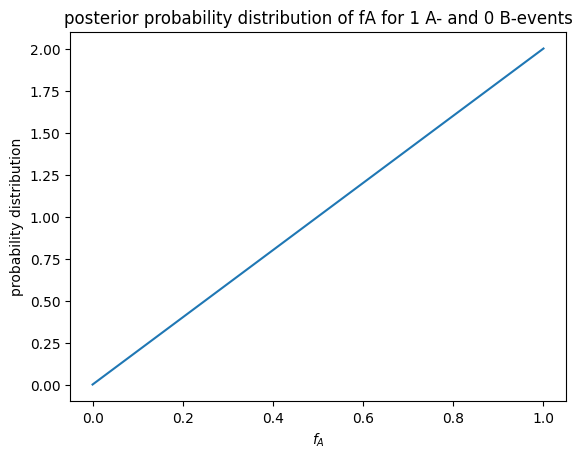

In [46]:
fA = sympy.Symbol('fA')                    # probability of the decay into alpha channel
    
def bayes(a, b):                           # likelihood function L(k|fA)
    print('Fall A:', a, '| B:', b)
    
    likely = math.comb(a+b, a)*fA**a*(1-fA)**b
    norm = sympy.integrate(likely, (fA, 0, 1))
    posteriori = likely/norm               # normalization
    
    print('Posteriori-Verteilung:', posteriori)
    return posteriori

def plotBayes(a, b):
    x = np.linspace(0, 1, 100)
    y = []
    function = bayes(a, b)
    for value in x:
        y.append(function.subs(fA, value))

    plt.plot(x, y)
    plt.xlabel('$f_A$')
    plt.ylabel('probability distribution')
    plt.title('posterior probability distribution of fA for ' + str(a) + ' A- and ' + str(b) + ' B-events')
    plt.show()

plotBayes(1,0)

d) Using the previous result as a prior, calculate and draw the new posterior after each of the observed additional decays "$\beta$", "$\alpha$", "$\alpha$", "$\beta$"

Fall A: 0 | B: 1
Posteriori-Verteilung: 6*fA*(1 - fA)


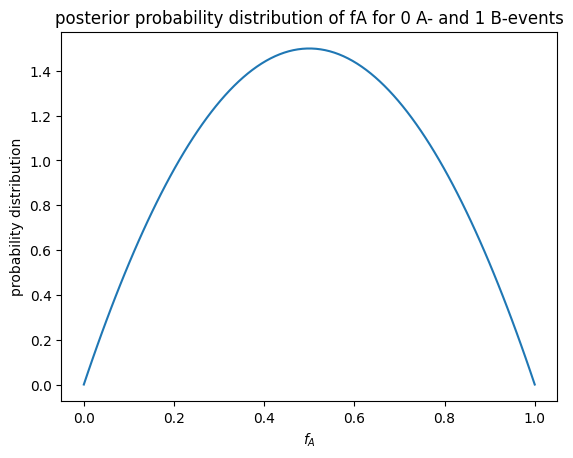

Fall A: 1 | B: 1
Posteriori-Verteilung: 12*fA**2*(1 - fA)


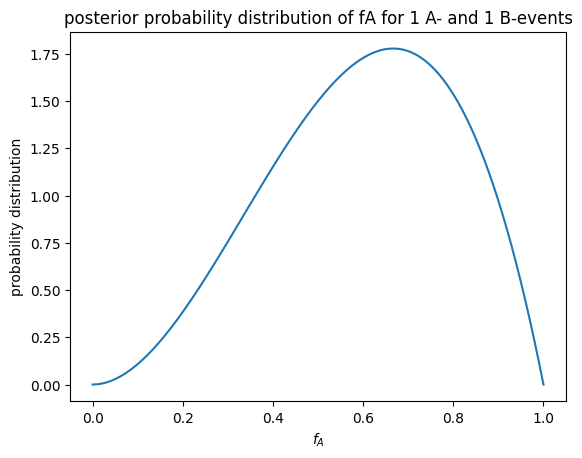

Fall A: 2 | B: 1
Posteriori-Verteilung: 20*fA**3*(1 - fA)


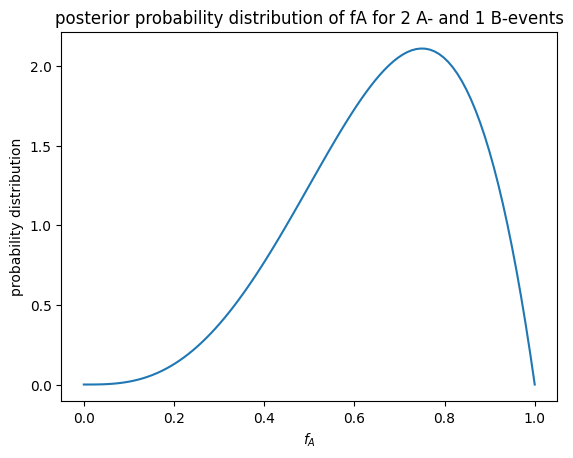

Fall A: 2 | B: 2
Posteriori-Verteilung: 60*fA**3*(1 - fA)**2


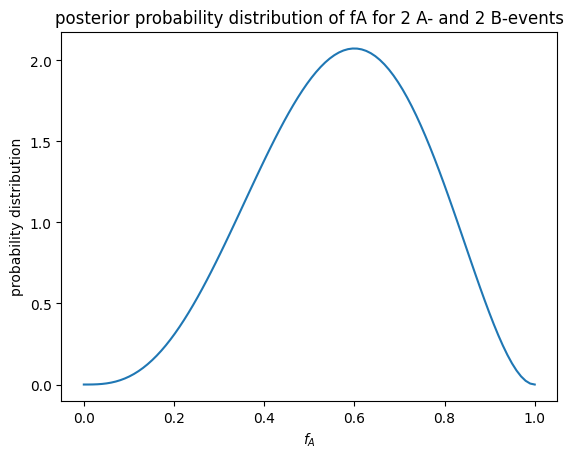

In [47]:
prior=2*fA

def bayes1(a, b):                           # likelihood function L(k|fA)
    print('Fall A:', a, '| B:', b)
    
    likely = sympy.binomial(a+b, a)*fA**a*(1-fA)**b*prior        # prior =/ 1
    norm = sympy.integrate(likely, (fA, 0, 1))
    posteriori = likely/norm               # normalization
    
    print('Posteriori-Verteilung:', posteriori)
    return posteriori

def plotBayes1(a, b):
    x = np.linspace(0, 1, 100)
    y = []
    function = bayes1(a, b)
    for value in x:
        y.append(function.subs(fA, value))

    plt.plot(x, y)
    plt.xlabel('$f_A$')
    plt.ylabel('probability distribution')
    plt.title('posterior probability distribution of fA for ' + str(a) + ' A- and ' + str(b) + ' B-events')
    plt.show()

plotBayes1(0,1)
plotBayes1(1,1)
plotBayes1(2,1)
plotBayes1(2,2)

e) Calculate and draw the posterior after observing 100 decays, with 58 going to $\alpha$.

Fall A: 58 | B: 42
Posteriori-Verteilung: 4934275406622319306134370831200*fA**59*(1 - fA)**42


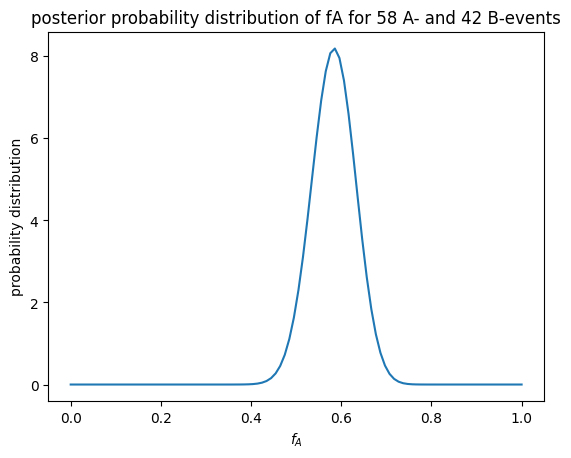

In [48]:
plotBayes1(58,42)